# Excersise 6

In [1]:
from itertools import groupby
with open("HariPota", encoding="UTF-8") as f:
    lines = [line for line in f]
    chapters = [list(group) for k, group in groupby(lines, lambda x: x.strip().startswith("CHAPTER")) if not k]
    chapters.pop(0)
    chapters = [' '.join(chapter) for chapter in chapters] 
    chapters = [[word for word in chapter.split()] for chapter in chapters ]

In [2]:
with open("stopwords", encoding="UTF-8") as stopwordsFile:
    stopwords = [word for line in stopwordsFile for word in line.split()]

In [20]:
%%capture
from string import punctuation
import sys
!{sys.executable} -m pip install stemming
from stemming.porter2 import stem

In [4]:
def clearyfyListOfWords(stopwords, words):
    words = [word.lower().translate(str.maketrans('', '', punctuation)) for word in words ]
    filtered_words = [w for w in words if not w in stopwords]
    filtered_words = [w for w in filtered_words if w != '']
    filtered_words = [stem(word) for word in filtered_words]
    
    return filtered_words

In [5]:
def countWords(words):
    wordsDict = dict()
    
    for word in words:
        if word in wordsDict:
            wordsDict[word] += 1
        else:
            wordsDict[word] = 1
            
    wordsCount = [(key, item) for key, item in wordsDict.items()]
    wordsCount.sort(key = lambda item: item[1], reverse = True)
    
    return wordsCount

In [6]:
preprocessedChapters = list(map(lambda chapter: clearyfyListOfWords(stopwords, chapter), chapters))

In [7]:
countedChapters = list(map(lambda chapter: dict(countWords(chapter)), preprocessedChapters))

In [8]:
def tf(term, document):
    if term in document:
        return document[term]
    else:
        return 0

In [9]:
def numberOfDocumentsWithTerm(term, collectionOfDocuments):
    return len(list(filter(lambda document: term in document, collectionOfDocuments)))

In [10]:
import math

def idf(term, collectionOfDocuments):
    denominator = numberOfDocumentsWithTerm(term, collectionOfDocuments)
    return math.log(len(collectionOfDocuments) / denominator)

In [11]:
def tf_idf(term, document, collection):
    return tf(term, document) * idf(term, collection)

In [12]:
def apply_tf_idf(document, collection):
    return dict(map(lambda term: (term, tf_idf(term, document, collection)), document))

In [13]:
analyzedChapters = list(map(lambda chapter: apply_tf_idf(chapter, countedChapters), countedChapters))

In [21]:
%%capture
from string import punctuation
import sys
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install matplotlib

from wordcloud import WordCloud
from matplotlib import pyplot as plt

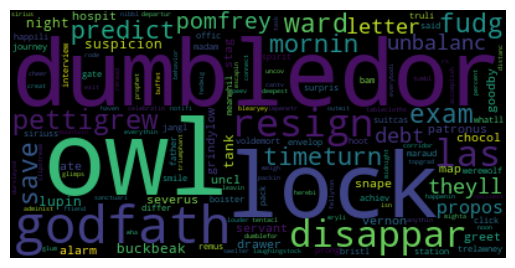

In [15]:
for chapterNumber, chapter in enumerate(analyzedChapters):
    plt.imshow(WordCloud().generate_from_frequencies(chapter), interpolation='bilinear')
    plt.axis("off")
    plt.savefig(f"chapter_{chapterNumber}")

# Excersise 7

In [16]:
def mostImportantInChapters(word, chapters):
    chaptersContaining = [(chapter, number) for number, chapter in enumerate(chapters) if word in chapter]
    chaptersContaining.sort(key = lambda item: item[0][word], reverse = True)
    return list(map(lambda item: {"chapter": item[1], "td-idf": item[0][word]}, chaptersContaining))

In [17]:
mostImportantInChapters("resign", analyzedChapters)

[{'chapter': 21, 'td-idf': 9.591581091193483},
 {'chapter': 9, 'td-idf': 2.3978952727983707}]

# Excersise 8

In [18]:
preprocessedChapters = list(map(lambda chapter: clearyfyListOfWords(stopwords, chapter), chapters))
wholePreprocessedText = [word for chapter in preprocessedChapters for word in chapter]

In [80]:
wordsDict = dict()

for i in range(len(wholePreprocessedText) - 1):
    word = wholePreprocessedText[i]
    nextWord = wholePreprocessedText[i + 1]

    if word not in wordsDict:
        wordsDict[word] = dict()
        
    if nextWord in wordsDict[word]:
        wordsDict[word][nextWord] += 1
    else: 
        wordsDict[word][nextWord] = 1

In [84]:
def sortDictionaryToList(dictionary):
    return sorted(list(dictionary.items()), key = lambda item: item[1], reverse = True)

wordsDictOfTop5 = {k: sortDictionaryToList(v)[:5] for k, v in wordsDict.items() if v != []}

In [88]:
import random 

def createRandomParagraph(paragraphLength, dictionaryOfWordsPrecedence):
    listOfWords = []
    lastWord, _ = random.choice(list(dictionaryOfWordsPrecedence.items()))
    listOfWords.append(lastWord)
    
    for i in range(paragraphLength - 1):
        lastWord, _ = random.choice(dictionaryOfWordsPrecedence[lastWord])
        listOfWords.append(lastWord)
    
    return listOfWords

In [90]:
paragraph = " ".join(createRandomParagraph(50, wordsDictOfTop5))

print(paragraph)

quicker blew hard tell harri ron hermion ron hermion said hermion whisper ron look harri didnt want kill go go harri look like see someth els said professor lupin said harri look around neck goyl short stretch hand still hadnt call harri hermion harri look back toward door open envelop
